In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Company_df = pd.read_csv('F:\\PYTHON\\DATA SCIENCE\\Decision Tree\\Assignment\\Company_Data.csv')

In [3]:
Company_df.shape

(400, 11)

In [4]:
Company_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
Company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
Company_df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

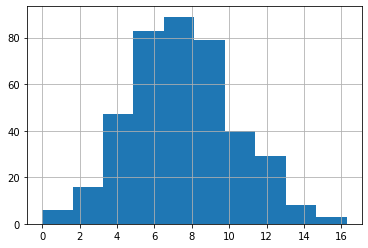

In [7]:
plt.hist(Company_df['Sales'])
plt.grid()
# Company Sales ranges between 0 to 17 thousand dollars.

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder = LabelEncoder()
Company_df['ShelveLoc'] = label_encoder.fit_transform(Company_df['ShelveLoc'])
Company_df['Urban'] = label_encoder.fit_transform(Company_df['Urban'])
Company_df['US'] = label_encoder.fit_transform(Company_df['US'])
# Trasforming categorical data

In [10]:
Company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [11]:
Company_df['High_sales'] = Company_df['Sales'].map(lambda x: 1 if x >= 8 else 0)
# Mapping sales > 8 thousand usd as 1 [high sales]

In [12]:
Company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High_sales
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [13]:
X = Company_df.iloc[ : ,1:-1]
Y = Company_df.iloc[ : ,-1]
# Dividing data into input and output variables 

# Feature selection using SelectKbest

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [15]:
Test = SelectKBest(score_func=chi2 ,k=6)
Test_fit = Test.fit(X,Y)


In [16]:
F_1 = Test_fit.scores_

In [17]:
Feature_1 = pd.DataFrame(F_1 , columns= ['Scores'])
Feature_1['Columns'] = X.columns

In [18]:
Feature_1 = Feature_1.sort_values('Scores' ,ascending=False).reset_index(drop=True)
# Feature scores sorted in decending order.

In [19]:
Feature_1

,Scores,Columns
0,229.449575,Price
1,228.319604,Advertising
2,110.856921,Income
3,76.899420,Age
4,61.779948,Population
5,4.751281,US
6,3.027221,ShelveLoc
7,2.226887,CompPrice
8,0.463007,Urban
9,0.118040,Education


# Feature selection using Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [21]:
Tree = DecisionTreeClassifier(criterion='entropy')
Tree_fit = Tree.fit(X,Y)

In [22]:
F_2 = Tree_fit.feature_importances_

In [23]:
Feature_2 = pd.DataFrame(F_2 , columns=['Info Gained'])
Feature_2['Columns'] = X.columns

In [24]:
Feature_2 = Feature_2.sort_values('Info Gained' , ascending= False).reset_index(drop=True)
# Info gained calculated using Decision tree.

In [25]:
Feature = pd.merge(Feature_1,Feature_2,on='Columns',how = 'outer')

In [26]:
Feature.head(6)
# Top 6 features based on Kbest and Decision Tree
# These has high impact in getting good sales/.

,Scores,Columns,Info Gained
0,229.449575,Price,0.229707
1,228.319604,Advertising,0.127789
2,110.856921,Income,0.125344
3,76.899420,Age,0.102753
4,61.779948,Population,0.059963
5,4.751281,US,0.015655


In [27]:
Feature.tail(3)
# Fetures that are not impacting high sales 

,Scores,Columns,Info Gained
7,2.226887,CompPrice,0.115441
8,0.463007,Urban,0.014106
9,0.118040,Education,0.040906


#  Decison Tree Model

In [28]:
Company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High_sales
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report


In [30]:
X_train ,X_test ,Y_train ,Y_test = train_test_split(X ,Y ,test_size= 0.25 ,random_state= 0 )

In [31]:
Model_1 = DecisionTreeClassifier()
Model = Model_1.fit(X_train,Y_train)

In [32]:
Predict = Model.predict(X_test)
pd.crosstab(Y_test ,Predict)

col_0,0,1
High_sales,,
0,44,11
1,14,31


In [33]:
np.mean(Predict == Y_test)
# accuracy of the model is 75%

0.75

# AdaBoost

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold,cross_val_score

In [35]:
kfold = KFold(n_splits= 8)

In [36]:
Model_2 = AdaBoostClassifier(base_estimator= DecisionTreeClassifier())
Results = cross_val_score(Model_2,X ,Y ,cv= kfold)
Results.mean()
# Model having accuracy of 70%

0.6975

# XGBoost

In [37]:
from xgboost import XGBClassifier

In [38]:
Model_3 = XGBClassifier(max_depth = 4)
Model_new = Model_3.fit(X_train ,Y_train)
Predict_3 = Model_new.predict(X_test)
np.mean(Predict_3==Y_test)
# Comparing to other 2 , this model has better accuracy with 82%

[10:54:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\admin\anaconda3.2\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.82

In [39]:
f_3 = Model_new.feature_importances_
# Feature Scores 

In [40]:
Feature_3 = pd.DataFrame(f_3 ,columns=['Info gain'])
Feature_3['Columns'] = X.columns

In [41]:
Feature_3 = Feature_3.sort_values('Info gain',ascending=False).reset_index(drop=True)

In [42]:
Feature_3.head(5)
# Below are the top 5 features responsible for high sales .

,Info gain,Columns
0,0.166871,ShelveLoc
1,0.160824,Price
2,0.143473,Advertising
3,0.132453,US
4,0.103063,CompPrice
